In [121]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/converted - Copy.csv')
data.head()

,text,label
0,these tiktoks radiate gay chaotic energy and i...,1
1,@Champions Again He got killed for using false...,1
2,It's not that all lives don't matter,1
3,Is it really that difficult to understand? Bla...,1
4,Whenever we say black isn't that racists? Why...,1


In [122]:
data.shape

(22743, 2)

In [123]:
data.label.value_counts()

1    20781
0     1962
Name: label, dtype: int64

In [124]:
X = data.iloc[:,:-1]
y = data.label
X.head()

,text
0,these tiktoks radiate gay chaotic energy and i...
1,@Champions Again He got killed for using false...
2,It's not that all lives don't matter
3,Is it really that difficult to understand? Bla...
4,Whenever we say black isn't that racists? Why...


In [125]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-125-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
0,21011
1,897
2,11073
3,10712
4,18228


In [126]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [127]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9122087058478675


col_0,0,1
label,,
0,78,504
1,95,6146


In [129]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[  78,  504],
       [  95, 6146]])

Text(50.722222222222214, 0.5, 'Truth')

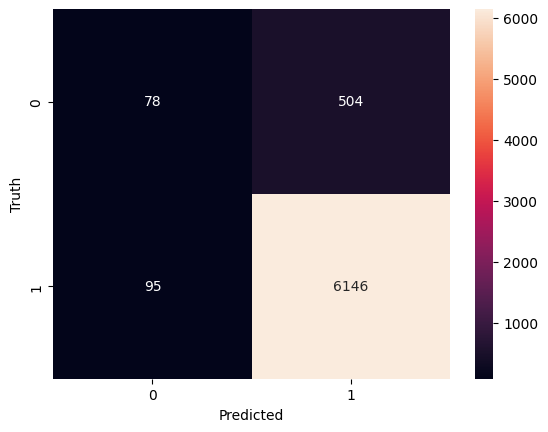

In [130]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [131]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.45      0.13      0.21       582
           1       0.92      0.98      0.95      6241

    accuracy                           0.91      6823
   macro avg       0.69      0.56      0.58      6823
weighted avg       0.88      0.91      0.89      6823



# Under Sampling

In [132]:
df_hope = data[data['label']==0]
df_hope.shape

(1962, 2)

In [133]:
df_nhope = data[data['label']==1]
df_nhope.shape

(20781, 2)

In [134]:
df_nhope_downsampled = df_nhope.sample(df_hope.shape[0])
df_nhope_downsampled.shape

(1962, 2)

In [135]:
df_balanced = pd.concat([df_hope, df_nhope_downsampled])
df_balanced.shape

(3924, 2)

In [136]:
X = df_balanced.iloc[:,:-1]
y = df_balanced.label
X.head()

,text
9,Network Engineer here- 23 and currently workin...
19,I'm still hiding my gender to my parents and t...
20,all lives matter .without that we never have p...
26,Randomgirlwhosings0804 Why does she feel the n...
45,it doesn't matter what your family does when y...


In [137]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-137-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
9,2300
19,1828
20,3433
26,2476
45,3571


In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'],df_balanced['label'], stratify=df_balanced['label'])

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [140]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [141]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.6213921901528013


col_0,0,1
label,,
0,343,256
1,190,389


In [142]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[343, 256],
       [190, 389]])

Text(50.722222222222214, 0.5, 'Truth')

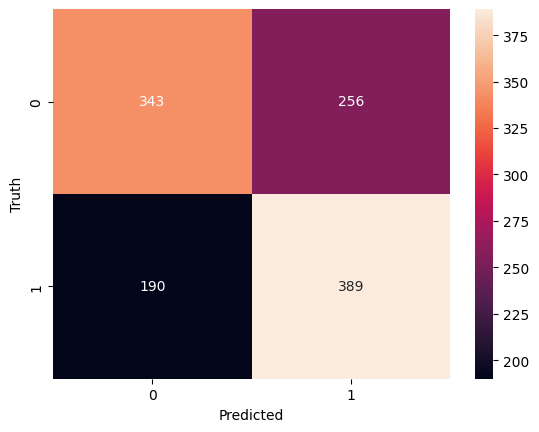

In [143]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [144]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.64      0.57      0.61       599
           1       0.60      0.67      0.64       579

    accuracy                           0.62      1178
   macro avg       0.62      0.62      0.62      1178
weighted avg       0.62      0.62      0.62      1178



# Over Sampling

In [145]:
X = data.iloc[:,:-1]
y = data.label
X.head()

,text
0,these tiktoks radiate gay chaotic energy and i...
1,@Champions Again He got killed for using false...
2,It's not that all lives don't matter
3,Is it really that difficult to understand? Bla...
4,Whenever we say black isn't that racists? Why...


In [146]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-146-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
0,21011
1,897
2,11073
3,10712
4,18228


In [147]:
df_hope_oversample = df_hope.sample(df_nhope.shape[0], replace=True)
df_over = pd.concat([df_hope_oversample, df_nhope], axis=0)

print('Random over-sampling:')
print(df_over.label.value_counts())

Random over-sampling:
0    20781
1    20781
Name: label, dtype: int64


In [148]:
X = df_over.iloc[:,:-1]
y = df_over.label
X.head()

,text
19696,I think women and men should be treated equal ...
5904,Candra Rakhmasari nYES!!! using religion to ab...
6937,A young lad was stabbed by a black guy in a ra...
19169,In God's eyes we all matter
13444,I don't believe in lying about yourself to mak...


In [149]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-149-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
19696,9637
5904,6262
6937,4155
19169,10596
13444,8765


In [150]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [151]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [152]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.8734461464431791


col_0,0,1
label,,
0,6156,62
1,1516,4735


In [153]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predict)
cm

array([[6156,   62],
       [1516, 4735]])

Text(50.722222222222214, 0.5, 'Truth')

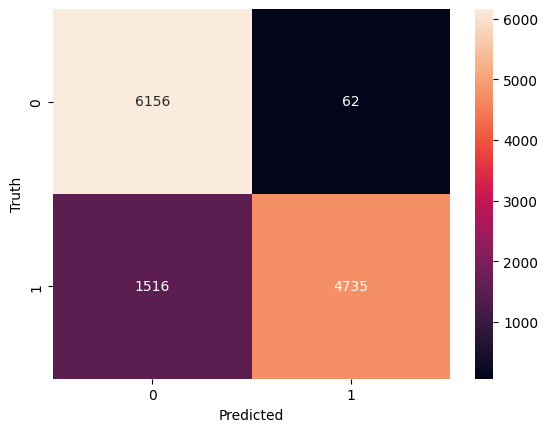

In [154]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [155]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      6218
           1       0.99      0.76      0.86      6251

    accuracy                           0.87     12469
   macro avg       0.89      0.87      0.87     12469
weighted avg       0.89      0.87      0.87     12469



# SMOTE

In [156]:
X = data.iloc[:,:-1]
y = data.label
X.head()

,text
0,these tiktoks radiate gay chaotic energy and i...
1,@Champions Again He got killed for using false...
2,It's not that all lives don't matter
3,Is it really that difficult to understand? Bla...
4,Whenever we say black isn't that racists? Why...


In [157]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X.loc[:,['text']] = \
X.loc[:,['text']].apply(enc.fit_transform)
X.head()

<ipython-input-157-7e2fafe9e82b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,['text']] = \


,text
0,21011
1,897
2,11073
3,10712
4,18228


In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=10)

In [159]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [160]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [161]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1: 14540, 0: 1380})
After SMOTE : Counter({1: 14540, 0: 14540})


In [162]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test)
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.6763886853290342


col_0,0,1
label,,
0,326,256
1,1952,4289


In [163]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[ 326,  256],
       [1952, 4289]])

Text(50.722222222222214, 0.5, 'Truth')

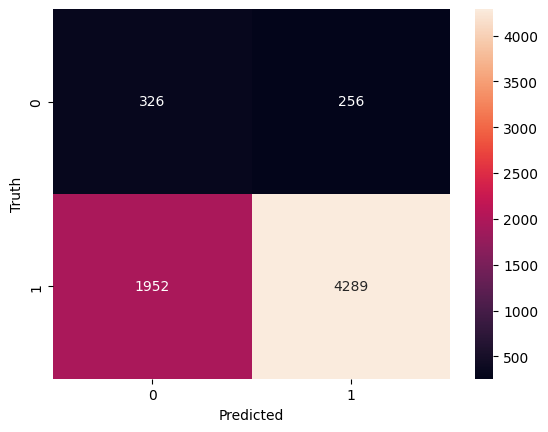

In [164]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [165]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.14      0.56      0.23       582
           1       0.94      0.69      0.80      6241

    accuracy                           0.68      6823
   macro avg       0.54      0.62      0.51      6823
weighted avg       0.88      0.68      0.75      6823

